<a href="https://colab.research.google.com/github/MerlinaAguel/CoffeeShop/blob/main/ProyectoFinalAguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción

Se trabajará a continuación sobre un dataset que refleja ventas de tres sucursales de diferentes barrios en una cafetería en Nueva York.
Se quiere entender si las distintas comunidades barriales reflejan diferentes patrones de comportamiento y por ende de compra de los productos que la cafeterís ofrece.

*Preguntas a resolver*

1. ¿Existen valores extremos para alguna tienda respecto a las demás?
2. ¿El café es el producto más vendido en todas las tiendas o varía según la ubicación?
3. ¿Los clientes prefieren tamaños grandes en bebidas calientes y pequeños en bebidas frías?
4. ¿Las ventas de granos de café están relacionadas con el consumo de café en la tienda?
5. ¿Hay horas pico donde se realizan más transacciones en las tiendas?
6. ¿Los fines de semana tienen mayor facturación que los días hábiles?
7. ¿Los clientes con tickets más altos compran productos de categoría "Premium"?



# Data Acquisition

In [128]:
#Librerías utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [129]:
#Lectura del CSV y creación del DataFrame
file_path = "https://raw.githubusercontent.com/MerlinaAguel/CoffeeShop/refs/heads/main/CoffeShopSales.csv"
df_coffee_shop = pd.read_csv(file_path, delimiter=";")

In [130]:
#Primera lectura de los datos dentro del notebook
print(df_coffee_shop.head())
print(df_coffee_shop.info())

   transaction_id transaction_date transaction_time  store_id store_location  \
0          114301           1/6/23         11:33:29         3        Astoria   
1          115405           2/6/23         11:18:24         3        Astoria   
2          115478           2/6/23         12:02:45         3        Astoria   
3          116288           2/6/23         19:39:47         3        Astoria   
4          116714           3/6/23         12:24:57         3        Astoria   

   product_id  transaction_qty  unit_price  Total_Bill product_category  \
0          45                1         3.0         3.0              Tea   
1          45                1         3.0         3.0              Tea   
2          45                1         3.0         3.0              Tea   
3          45                1         3.0         3.0              Tea   
4          45                1         3.0         3.0              Tea   

        product_type product_detail   Size Month Name  Day Name  Hou

In [145]:
#Modificación de datos de fecha a datetime
df_coffee_shop["transaction_date"] = pd.to_datetime(df_coffee_shop["transaction_date"], format="%d/%m/%y")

#Modificació a object de datos categóricos
df_coffee_shop["transaction_id"] = df_coffee_shop["transaction_id"].astype("object")
df_coffee_shop["store_id"] = df_coffee_shop["store_id"].astype("object")
df_coffee_shop["product_id"] = df_coffee_shop["product_id"].astype("object")
df_coffee_shop["Day of Week"] = df_coffee_shop["Day of Week"].astype("object")
df_coffee_shop["product_type"] = df_coffee_shop["product_type"].astype("object")

print(df_coffee_shop.describe())

                    transaction_date  transaction_qty     unit_price  \
count                         149116    149116.000000  149116.000000   
mean   2023-04-15 11:50:32.173609984         1.438276       3.382219   
min              2023-01-01 00:00:00         1.000000       0.800000   
25%              2023-03-06 00:00:00         1.000000       2.500000   
50%              2023-04-24 00:00:00         1.000000       3.000000   
75%              2023-05-30 00:00:00         2.000000       3.750000   
max              2023-06-30 00:00:00         8.000000      45.000000   
std                              NaN         0.542509       2.658723   

          Total_Bill           Hour          Month  
count  149116.000000  149116.000000  149116.000000  
mean        4.686367      11.735790       3.988881  
min         0.800000       6.000000       1.000000  
25%         3.000000       9.000000       3.000000  
50%         3.750000      11.000000       4.000000  
75%         6.000000      15.0000

Con la información extraída en primera lectura podemos identificar lo siguiente:

1. Transaction Quantity: la transacción máxima comprende 8 productos, siendo la media de compra menor a 2 unidades por transacción.
2. Unit Price: el precio de producto más alto es de USD 45, mientras que la media de los productos es de USD 3.38.
3. Total Bill: la facturación más alta fue de USD 360 y su valor promedio es de USD 4.68 en una sola tranasacción.

Esto nos da la idea que en general y sin discriminar por tienda, las compras en general suelen ser individuales, dando la idea de que es una cafetería al paso, que no reúne grupos de personas a comprar productos en cantidad o disfrutar de meriendas o desayunos completos, sino que el comportamiento de compra se ajusta a una bebida o un comestible por compra.
Además, los precios de los productos van desde menos de USD 1 y hasta USD 45, sin embargo parece que el público que lo frecuenta no elige los productos premium o de mayor valor. Lo terminaremos por confirmar más adelante.


#Análisis Exploratorio de los Datos (EDA)

###Período del Dataset

In [132]:
df_coffee_shop["transaction_date"] = pd.to_datetime(df_coffee_shop["transaction_date"], format="%d/%m/%y")
fecha_inicio= df_coffee_shop["transaction_date"].min()
fecha_fin= df_coffee_shop["transaction_date"].max()
print(f"El dataset contiene datos desde {fecha_inicio} hasta {fecha_fin}")

El dataset contiene datos desde 2023-01-01 00:00:00 hasta 2023-06-30 00:00:00


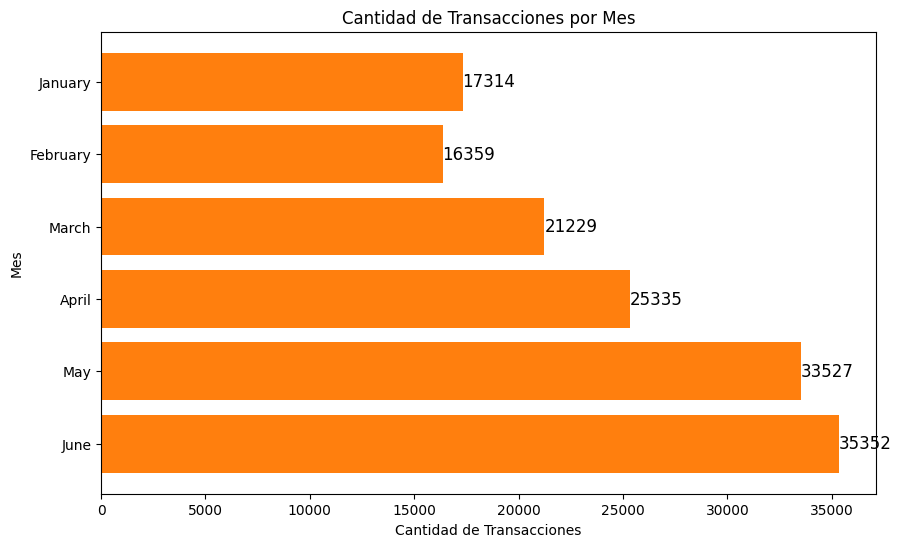

In [156]:
transacciones_por_mes = df_coffee_shop["Month Name"].value_counts().reindex(
    ["January", "February", "March", "April", "May", "June"], fill_value=0
)
plt.figure(figsize=(10, 6))
bars = plt.barh(transacciones_por_mes.index, transacciones_por_mes.values)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), va='center', ha='left', fontsize=12, color='black')
plt.barh(transacciones_por_mes.index, transacciones_por_mes.values)
plt.xlabel("Cantidad de Transacciones")
plt.ylabel("Mes")
plt.title("Cantidad de Transacciones por Mes")
plt.gca().invert_yaxis()
plt.show()

Este gráfico nos sugiere que a partir de abril aumenta considerablemente el volumen de transacciones, coincidente la época con el fin de la estación invierno en Nueva York. Posiblemente, las cafeterías se encuenren emplazadas con espacios al aire libre y el público aprovecha sus productos con más gusto cuando las temperaturas aumentan.

###Sumatoria total facturación y productos vendidos

In [133]:
fact_total = df_coffee_shop["Total_Bill"].sum().round(2)
prod_total = df_coffee_shop["transaction_qty"].sum()
print(f"La sumatoria total de facturación es: ${fact_total}")
print(f"La sumatoria total de cantidad de productos vendidos es: {prod_total}")

La sumatoria total de facturación es: $698812.33
La sumatoria total de cantidad de productos vendidos es: 214470


    store_location  facturacion_total  cant_prod
0          Astoria          232243.91      70991
1   Hell's Kitchen          236511.17      71737
2  Lower Manhattan          230057.25      71742


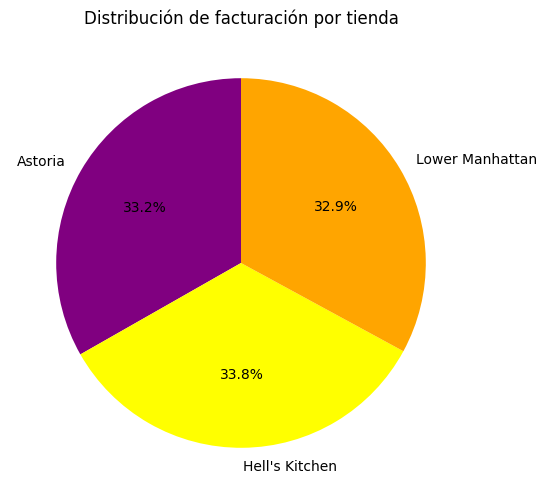

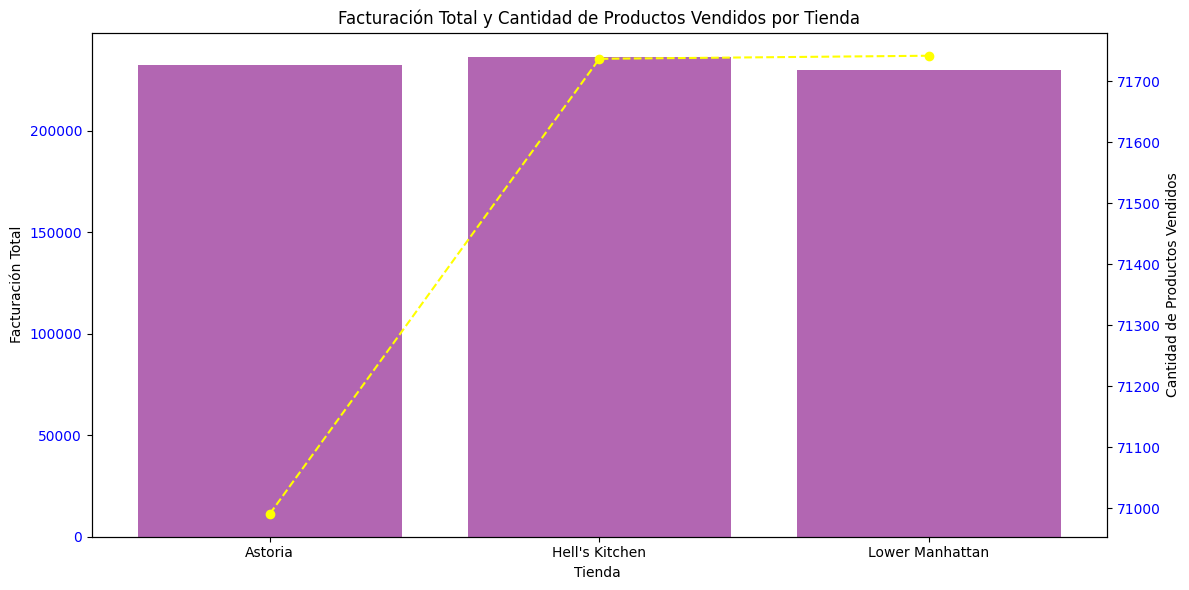

In [166]:
ventas_por_tienda= df_coffee_shop.groupby("store_location").agg(
    facturacion_total=("Total_Bill", "sum"),
    cant_prod=("transaction_qty", "sum")
).reset_index()
facturacion_por_tienda= df_coffee_shop.groupby("store_location")["Total_Bill"].sum()

print(ventas_por_tienda)

plt.figure(figsize=(6,6))
plt.pie(facturacion_por_tienda, labels=facturacion_por_tienda.index, autopct="%1.1f%%", startangle=90, colors=["purple", "yellow", "orange"])
plt.title("Distribución de facturación por tienda")
plt.show()

fig, ax1= plt.subplots(figsize=(12,6))
ax1.bar(ventas_por_tienda["store_location"], ventas_por_tienda["facturacion_total"], color="purple", alpha=0.6, label="Facturación Total")
ax1.set_xlabel("Tienda ")
ax1.set_ylabel("Facturación Total", color="black")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(ventas_por_tienda["store_location"], ventas_por_tienda["cant_prod"], color="yellow", marker="o", linestyle="--", label="Cantidad de Productos Vendidos")
ax2.set_ylabel("Cantidad de Productos Vendidos", color="black")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Facturación Total y Cantidad de Productos Vendidos por Tienda")
fig.tight_layout()
plt.show()

Las anteriores visualizaciones nos permiten responder la primera pregunta de nuestra hipótesis, confirmando que los valores de facturación y cantidad de transacciones por tienda son absolutamente parejas y no representan datos extremos una respecto a las otras.

###Identificación de datos específicos por categoría de producto

In [168]:
cafe = "Coffee"
size_available= df_coffee_shop[df_coffee_shop["product_category"] == cafe]["Size"].unique()
coffee_type= df_coffee_shop[df_coffee_shop["product_category"] == cafe]["product_type"].unique()
print(f"Los tamaños de café disponibles son: {size_available}")
print(f"Los tipos de café disponibles son: {coffee_type}")

Los tamaños de café disponibles son: ['Large' 'Regular' 'Not Defined' 'Small']
Los tipos de café disponibles son: ['Drip coffee' 'Organic brewed coffee' 'Barista Espresso'
 'Gourmet brewed coffee' 'Premium brewed coffee']


In [135]:
tea = "Tea"
size_available= df_coffee_shop[df_coffee_shop["product_category"] == tea]["Size"].unique()
tea_type= df_coffee_shop[df_coffee_shop["product_category"] == tea]["product_type"].unique()
tea_detail = df_coffee_shop[df_coffee_shop["product_category"] == tea]["product_detail"].unique()
print(f"Los tamaños de té disponibles son: {size_available}")
print(f"Los tipos de té disponibles son: {tea_type}")
print(f"Los variantes de té disponibles son: {tea_detail}")

Los tamaños de té disponibles son: ['Large' 'Regular']
Los tipos de té disponibles son: ['Brewed herbal tea' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed Chai tea']
Los variantes de té disponibles son: ['Peppermint' 'Lemon Grass' 'Earl Grey' 'English Breakfast'
 'Serenity Green Tea' 'Traditional Blend Chai' 'Morning Sunrise Chai'
 'Spicy Eye Opener Chai']


In [136]:
beans= "Coffee beans"
beans_detail = df_coffee_shop[df_coffee_shop["product_category"] == beans]["product_type"].unique()
print(f"Los tipos de granos de café disponibles son: {beans_detail}")

Los tipos de granos de café disponibles son: ['Espresso Beans' 'Green beans' 'Organic Beans' 'Premium Beans'
 'Gourmet Beans' 'House blend Beans']


###Resumen de ventas y transacciones por tienda y por mes

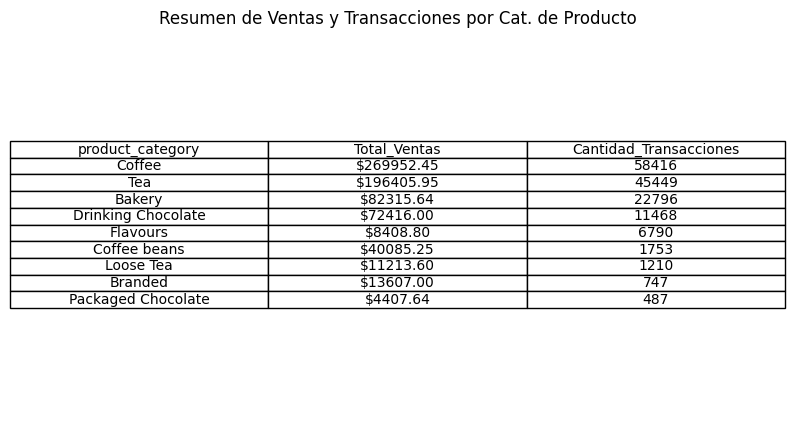

In [137]:
ventas_resumen = df_coffee_shop.groupby(["product_category"]).agg(
    Total_Ventas=("Total_Bill", "sum"),
    Cantidad_Transacciones=("transaction_id", "count")
).reset_index()
ventas_resumen["Total_Ventas"]= ventas_resumen["Total_Ventas"].map("${:.2f}".format)
ventas_resumen = ventas_resumen.sort_values(by="Cantidad_Transacciones", ascending=False)

fig, ax= plt.subplots(figsize=(10,5))
ax.axis('tight')
ax.axis('off')

table_data = [ventas_resumen.columns.tolist()] + ventas_resumen.values.tolist()
table = ax.table(cellText=table_data, loc="center", cellLoc="center", colLoc="center")
table.set_fontsize(10)
plt.title("Resumen de Ventas y Transacciones por Cat. de Producto")
plt.show()

###Resumen de precios por cateogría y tipo de producto

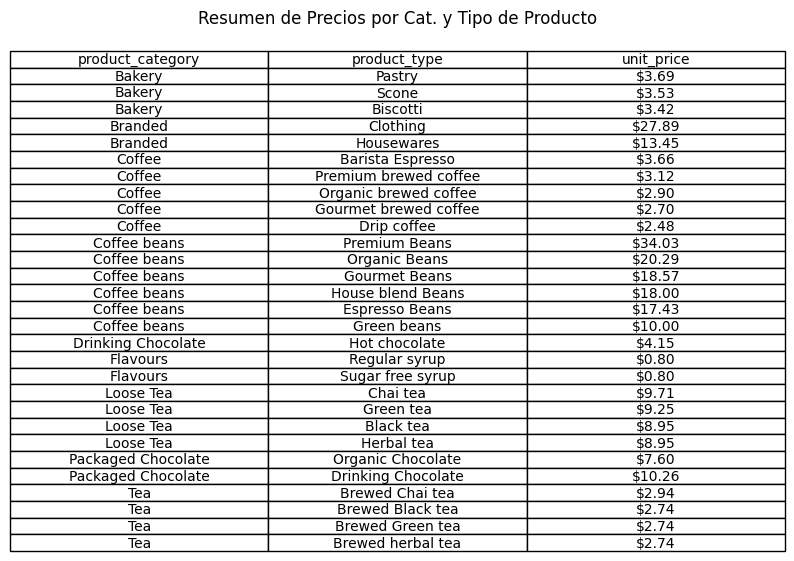

In [138]:
resumen_precios = df_coffee_shop.groupby(["product_category", "product_type"])["unit_price"].mean().reset_index()
resumen_precios["unit_price"]= resumen_precios["unit_price"].map("${:.2f}".format)
resumen_precios = resumen_precios.sort_values(by=["product_category", "unit_price"], ascending=[True, False])
fig, ax = plt.subplots(figsize=(10,5))
ax.axis('tight')
ax.axis('off')
prices_table = [resumen_precios.columns.tolist()] + resumen_precios.values.tolist()
prices = ax.table(cellText=prices_table, loc="center", cellLoc="center", colLoc="center")
prices.set_fontsize(10)
plt.title("Resumen de Precios por Cat. y Tipo de Producto", y=1.2)
plt.show()


##Ventas según categoría de producto en cada tienda

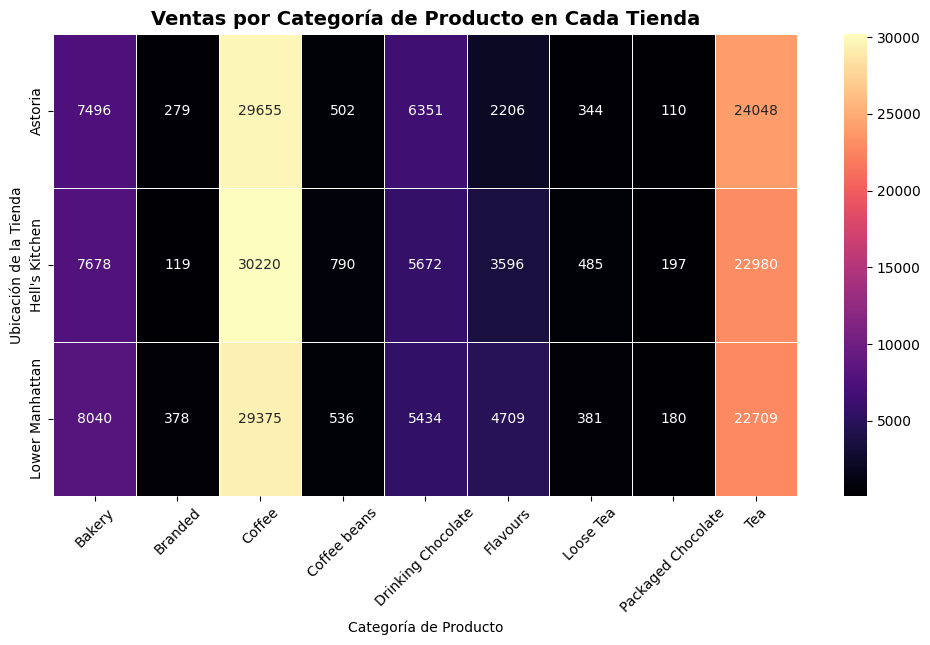

In [172]:
ventas_por_tienda_producto = df_coffee_shop.groupby(["store_location", "product_category"])["transaction_qty"].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(ventas_por_tienda_producto, cmap="magma", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Ventas por Categoría de Producto en Cada Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Categoría de Producto")
plt.ylabel("Ubicación de la Tienda")
plt.xticks(rotation=45)
plt.show()


Del anterior gráfico se desprende la confirmación de que para las tres tiendas el café es el producto que mayor salida tiene, con un leve protagonismo por parte de la tienda Hell's Kitchen respecto a las demás, que incluso es la tienda que mayor cantidad de café en grano vende y el que menor saborizantes consume (flavoured). Esto habla de un público que elige mayormente la bebida premium, de calidad y disfruta el café de calidad. Por otro lado, la tienda Lower Manhattan da la idea de tener un público que si elige saborizantes artificiales y a su vez consume mayor cantidad de pastelería y productos azucarados. Adicionalmente, la tienda recién mencionada protagoniza respecto a las otras dos tiendas la venta de merchandising de la cafetería.
Por último, la tienda Astoria resulta ser la que menos savorizantes artificales consume y destaca en el conusmo de chocolate caliente respecto a las demás.

##Preferencia respecto a tamaño elegido en las bebidas

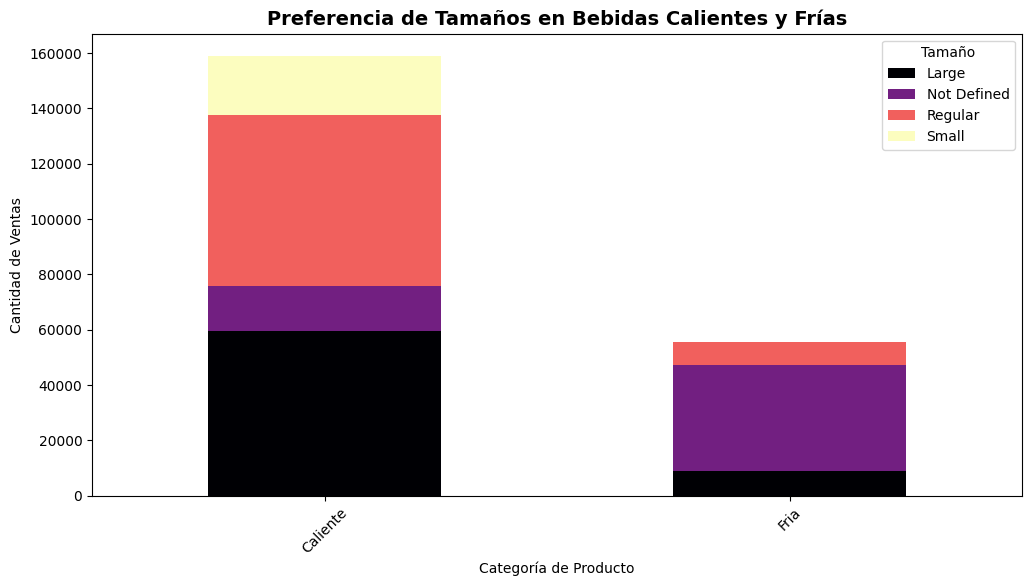

In [175]:
bebidas_calientes = ["Coffee", "Tea"]
bebidas_frias = ["Cold Brew", "Iced Tea"]
df_coffee_shop["Tipo_Bebida"] = df_coffee_shop["product_category"].apply(
    lambda x: "Caliente" if x in bebidas_calientes else ("Fría" if x in bebidas_frias else "Fria")
)
ventas_por_tamano = df_coffee_shop.groupby(["Tipo_Bebida", "Size"])["transaction_qty"].sum().unstack()

ventas_por_tamano.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="magma")
plt.title("Preferencia de Tamaños en Bebidas Calientes y Frías", fontsize=14, fontweight="bold")
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Tamaño")

plt.show()

##Ventas por categoría de producto




<ipython-input-140-45d32e3b9c60>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_coffee_shop['product_category'].value_counts().index, y=df_coffee_shop['product_category'].value_counts().values, palette="magma")


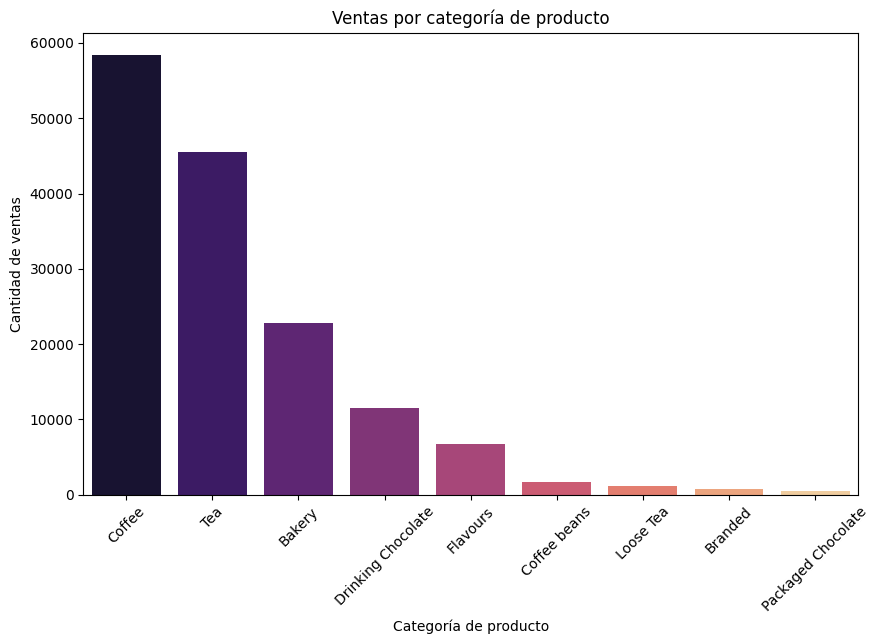

In [140]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_coffee_shop['product_category'].value_counts().index, y=df_coffee_shop['product_category'].value_counts().values, palette="magma")
plt.title("Ventas por categoría de producto")
plt.xlabel("Categoría de producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()

<ipython-input-141-d976d18e947f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_promedio_categoria["product_category"], y=ticket_promedio_categoria["Total_Bill"], palette="magma")


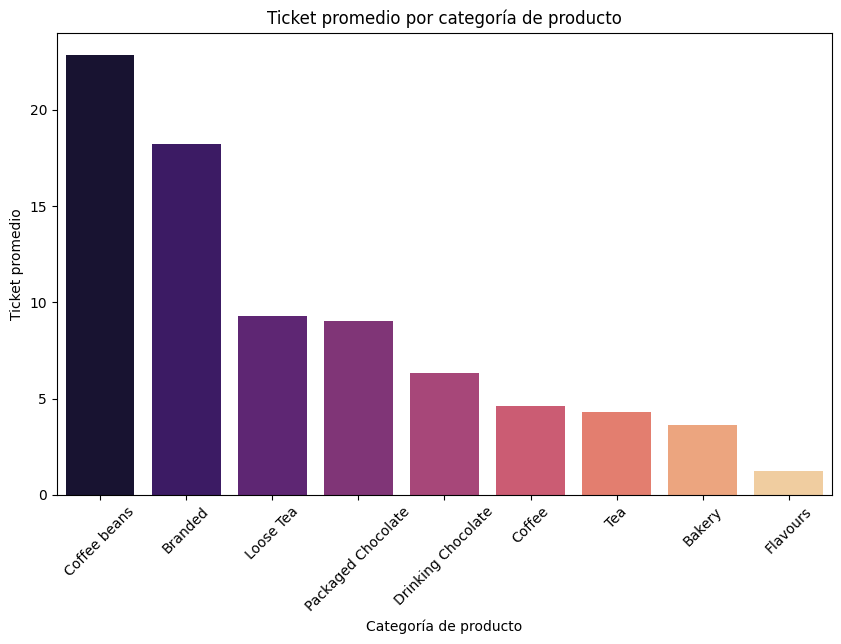

In [141]:
ticket_promedio_categoria= df_coffee_shop.groupby("product_category")["Total_Bill"].mean().reset_index()
ticket_promedio_categoria= ticket_promedio_categoria.sort_values(by="Total_Bill",ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=ticket_promedio_categoria["product_category"], y=ticket_promedio_categoria["Total_Bill"], palette="magma")
plt.title("Ticket promedio por categoría de producto")
plt.xlabel("Categoría de producto")
plt.ylabel("Ticket promedio")
plt.xticks(rotation=45)
plt.show()

##Heatmap de transacciones por hora y día de la semana  

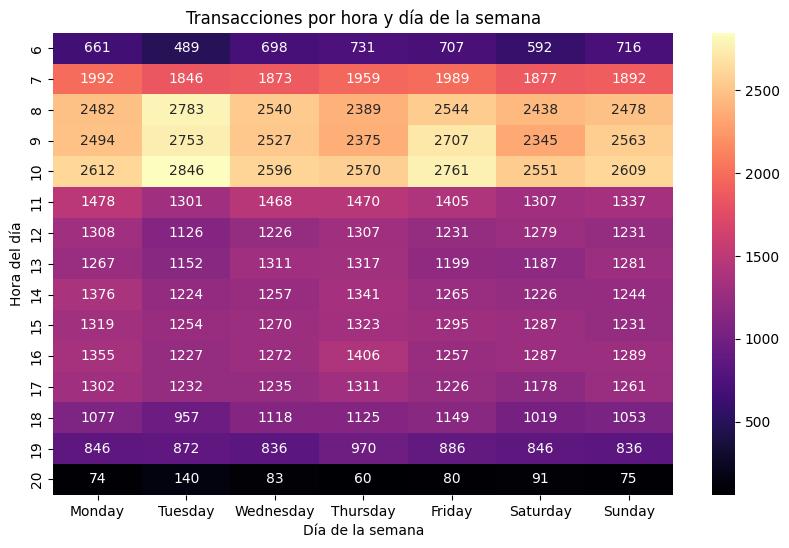

In [139]:
plt.figure(figsize=(10,6))
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_coffeeshop = df_coffee_shop.pivot_table(index='Hour', columns='Day Name', values='transaction_id', aggfunc='count')
heatmap_coffeeshop = heatmap_coffeeshop.reindex(columns=orden_dias)
sns.heatmap(heatmap_coffeeshop, cmap="magma", annot=True, fmt=".0f")
plt.title("Transacciones por hora y día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Hora del día")
plt.show()

El gráfico anterior confirma que para las tres tiendas los horarios de mayor pico de consumo son por la tarde, presentando un gran diferencial respecto al horario de la tarde, que va disminuyendo progresivamente desde las 11 hs hasta las 20 hs.

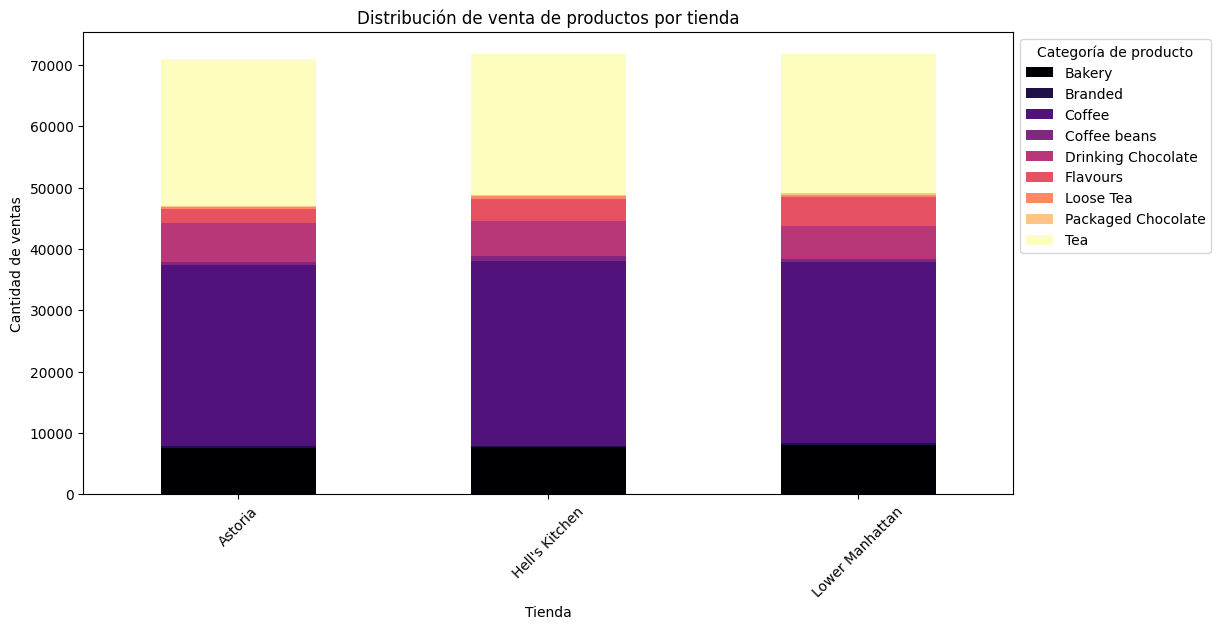

In [142]:
ventas_por_tienda_producto = df_coffee_shop.groupby(["store_location", "product_category"])["transaction_qty"].sum().unstack()
ventas_por_tienda_producto.plot(kind="bar", stacked=True, figsize=(12,6), colormap="magma")
plt.title("Distribución de venta de productos por tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de ventas")
plt.legend(title="Categoría de producto", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

##Relación entre venta de granos de café y consumo en tienda  

<Figure size 1200x600 with 0 Axes>

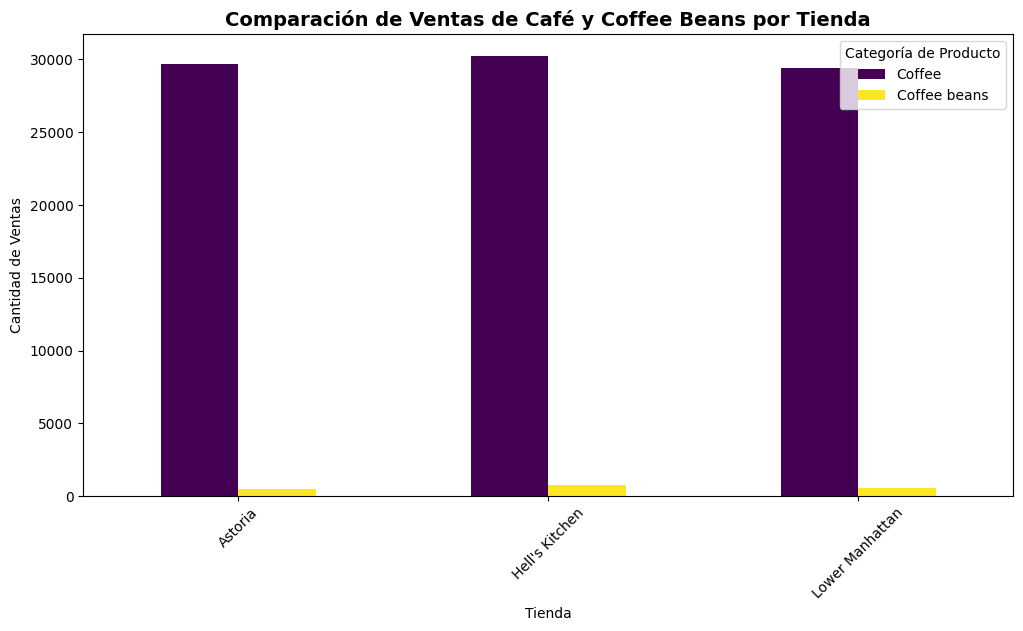

In [185]:
ventas_cafe_beans = df_coffee_shop[df_coffee_shop["product_category"].isin(["Coffee", "Coffee beans"])].groupby(["store_location", "product_category"])["transaction_qty"].sum().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
ventas_cafe_beans.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Comparación de Ventas de Café y Coffee Beans por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Categoría de Producto")

plt.show()

En síntesis, el gráfico anterior nos confirma que la preferencia para las tres tiendas es de consumo de café en tienda y no de grano para preparar en casa.

#Evaluación y Validación de Modelos de Machine Learning

A continuación avanzaremos con la creación de un modelo de predicción para entender si en un período estival de mayores temperaturas (fin de primavera y verano) los compartmientos de consumo de los clientes variarían respecto a los reflejados en el actual dataset.

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor



In [193]:
#Conversión de variables categóricas a numéricas
categorical_columns = ['store_location', 'product_category', 'product_type', 'Size']
df_coffee_ml = pd.get_dummies(df_coffee_shop, columns=categorical_columns, drop_first=True)


In [194]:
features = ['store_id', 'Hour', 'Day of Week', 'Month', 'product_id', 'transaction_qty', 'unit_price'] + \
           [col for col in df_coffee_ml.columns if col.startswith(('store_location_', 'product_category_', 'product_type_', 'Size_'))]

X = df_coffee_ml[features]
y = df_coffee_ml['Total_Bill']

# Dividisión en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2

(0.41912958933182043, 0.6211815552457383)

En primera instancia se intenta predecir el comportamiento de facturación, sin embargo se avanza sobre una prueba con otro modelo ya que el coeficiente de determinación del modelo de regresión es del 62% y podríamos mejorarlo con otro enfoque.


In [197]:
tree_model_tuned = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model_tuned.fit(X_train, y_train)
y_pred_tree_tuned = tree_model_tuned.predict(X_test)

mae_tree_tuned = mean_absolute_error(y_test, y_pred_tree_tuned)
r2_tree_tuned = r2_score(y_test, y_pred_tree_tuned)

mae_tree_tuned, r2_tree_tuned

(0.45827402151837027, 0.9781082549102015)

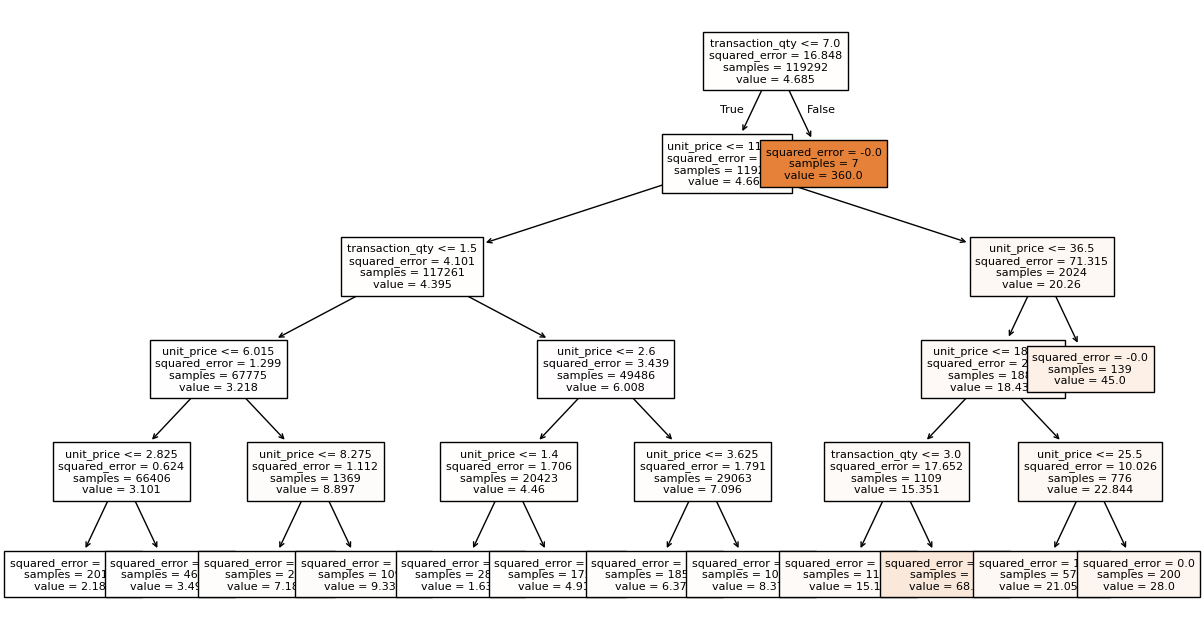

In [200]:
final_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
final_tree_model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(final_tree_model, feature_names=X.columns, filled=True, fontsize=8)
plt.show()

El modelo a través de árbol de decisión no resulta revelador respecto a mostrar impacto en variables como la tienda o categoría de producto. Por lo que avanzaremos sobre un modelo que analice ciertas variables asociadas a la venta de Coffee Beans.
Los granos de café son un producto premium con alto ticket pero baja cantidad de ventas. Por ende, analizaremos en qué horario sería conveniente incorporar una promoción a este producto al estilo "happy hour" para mejorar su demanda.

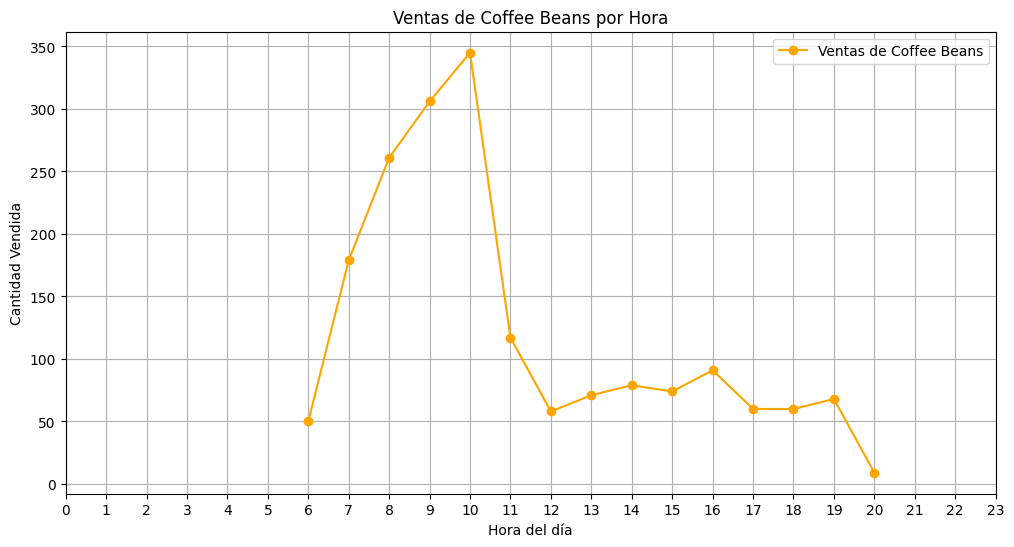

In [215]:
coffee_beans_df = df_coffee_shop[df_coffee_shop['product_category'] == beans]
hourly_sales = coffee_beans_df.groupby('Hour')['transaction_qty'].sum()

plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', linestyle='-', label="Ventas de Coffee Beans", color="orange")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad Vendida")
plt.title("Ventas de Coffee Beans por Hora")
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.legend()
plt.show()


Obtenido el gráfico de ventas de Coffee Beans por hora podemos preseleccionar ciertos horarios como convenientes para la aplicación de un descuento como el de las 12 hs o entre las 17 y 20 hs.

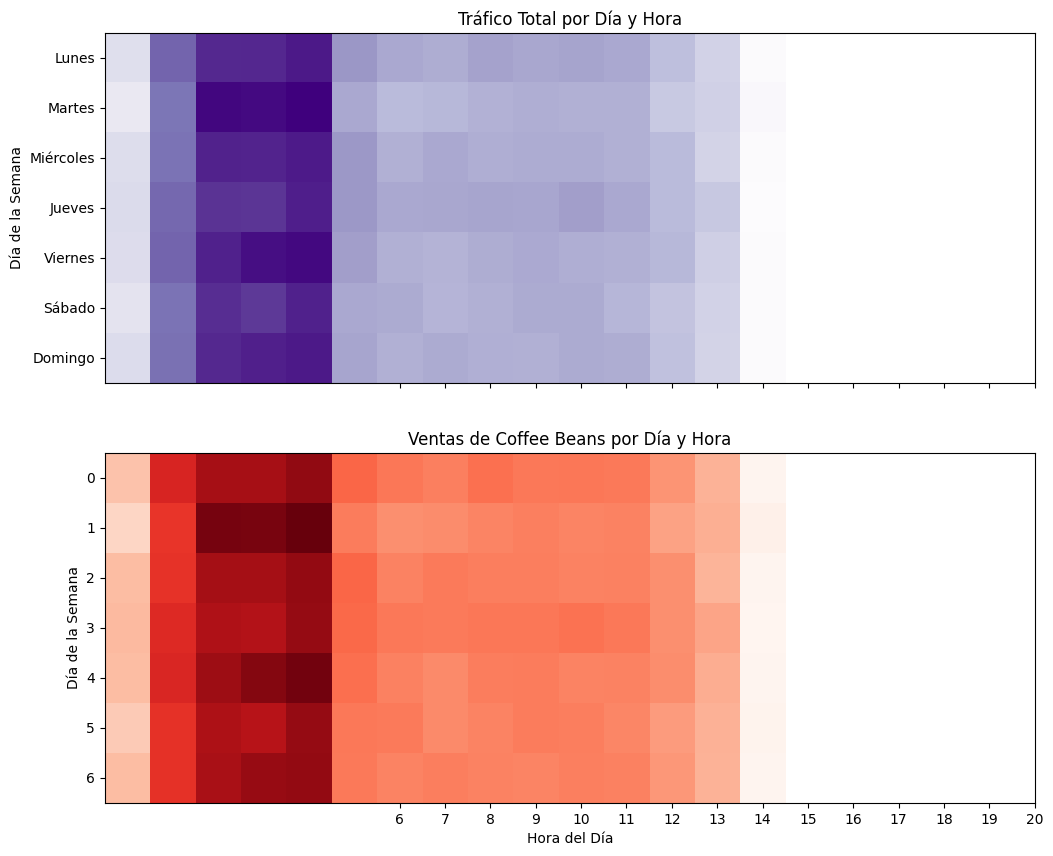

In [221]:

hour_filtered = df_coffee_shop[(df_coffee_shop['Hour'] >= 6) & (df_coffee_shop['Hour'] <= 20)]
coffee_beans_sales_by_day_hour = hour_filtered.groupby(['Day of Week', 'Hour'])['transaction_qty'].sum().unstack()

total_traffic_by_day_hour = hour_filtered.groupby(['Day of Week', 'Hour'])['transaction_id'].count().unstack()

normalized_sales = coffee_beans_sales_by_day_hour / coffee_beans_sales_by_day_hour.max().max()
normalized_traffic = total_traffic_by_day_hour / total_traffic_by_day_hour.max().max()

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

axes[0].imshow(normalized_traffic, cmap='Purples', aspect='auto', interpolation='nearest')
axes[0].set_title("Tráfico Total por Día y Hora")
axes[0].set_ylabel("Día de la Semana")
axes[0].set_yticks(range(7))
axes[0].set_yticklabels(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"])

axes[1].imshow(normalized_sales, cmap='Reds', aspect='auto', interpolation='nearest')
axes[1].set_title("Ventas de Coffee Beans por Día y Hora")
axes[1].set_ylabel("Día de la Semana")
axes[1].set_xlabel("Hora del Día")
axes[1].set_xticks(range(6,21))
axes[1].set_xticklabels(range(6,21))

plt.show()


Ciertos momentos de tráfico intenso y baja venta de coffee beans nos dan la pauta de poder funcionar en caso de aplicar descuento a ese producto a modo "Happy Hour".

Error Medio Absoluto (MAE): 3.747692729605141
Coeficiente de Determinación (R²): 0.9160721879131879


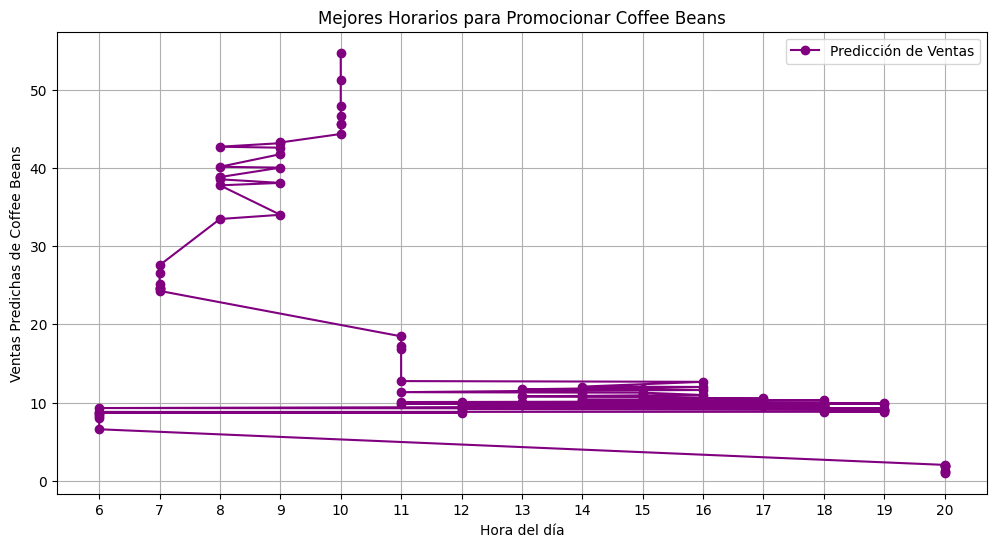

In [233]:
#Filtrado de datos para Coffee Beans
df_coffee_beans = df_coffee_shop[df_coffee_shop['product_category'] == "Coffee beans"].copy()

#Clusterización de ventas de Coffee Beans por día de la semana y hora
coffee_beans_sales_by_day_hour = df_coffee_beans.groupby(['Day of Week', 'Hour'])['transaction_qty'].sum().unstack(fill_value=0)

#Cálculo de tráfico total de clientes por día y hora
total_traffic_by_day_hour = df_coffee_shop.groupby(['Day of Week', 'Hour'])['transaction_id'].count().unstack(fill_value=0)

#Creación de un DataFrame para el modelo de regresión
df_regression = pd.DataFrame({
    'Day of Week': np.repeat(range(7), 15),  # 7 días x 15 horas (6 a 20)
    'Hour': list(range(6, 21)) * 7,
    'Sales_Coffee_Beans': coffee_beans_sales_by_day_hour.values.flatten(),
    'Total_Traffic': total_traffic_by_day_hour.values.flatten()
})

#Definición de variables predictoras (X) y variable objetivo (y)
X = df_regression[['Day of Week', 'Hour', 'Total_Traffic']]
y = df_regression['Sales_Coffee_Beans']

#División en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamiento del modelo de regresión (Random Forest)
regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

#Predicción en el conjunto de prueba
y_pred = regressor.predict(X_test)

#Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Medio Absoluto (MAE): {mae}')
print(f'Coeficiente de Determinación (R²): {r2}')

#Predicciones para todo el dataset
df_regression['Predicted_Sales'] = regressor.predict(X)

#Orden de los horarios por la predicción de ventas de Coffee Beans
best_times = df_regression.sort_values(by='Predicted_Sales', ascending=False)

#Visualización de los mejores horarios para promocionar Coffee Beans
plt.figure(figsize=(12, 6))
plt.plot(best_times['Hour'], best_times['Predicted_Sales'], marker='o', linestyle='-', label="Predicción de Ventas", color="purple")
plt.xlabel("Hora del día")
plt.ylabel("Ventas Predichas de Coffee Beans")
plt.title("Mejores Horarios para Promocionar Coffee Beans")
plt.xticks(np.arange(6, 21, 1))
plt.grid(True)
plt.legend()
plt.show()



#Conclusión

Tras explorar el dataset e identificar cierta homogeneidad en los datos, la conclusión es que no hay modelo que permita predecir sin sobreajustarse a los datos.
Independientemente de ello, propuse una estrategia hipotética de involucrar una hora especial en un día especial para promocionar los Coffee Beans (producto de alto ticket y poca salida) y para ello se utilizó un modelo de regresión que arrojó como oportunidad el horario entre las 16 y 16 hs como momento del día que mayor oportunidad de mejorar las ventas tiene. Además, conjugando esta información con la del gráfico anterior que ilustra los días de la semana que mayo tráfico tienen, nos encontramos con que los martes o viernes pueden ser los mejores para aplicar este tipo de promoción y sacarle provecho.